In [103]:
import pandas as pd
import numpy as np

train_set = pd.read_csv('E:/DS_and_ML/datasets/titanic/train.csv')
test_set = pd.read_csv("E:/DS_and_ML/datasets/titanic/test.csv")

In [104]:
train_set.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
test_set.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Analyzing data

In [106]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [107]:
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [108]:
test_set.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

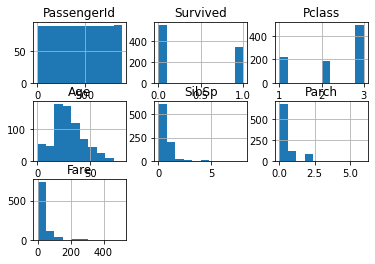

In [109]:
train_set.hist()

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

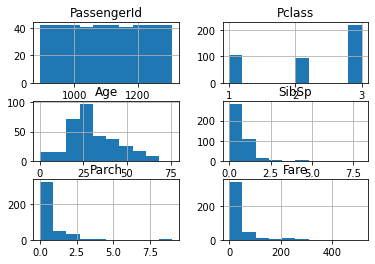

In [110]:
test_set.hist()

# Data prepration

In [111]:
train_set['Sex'] = train_set['Sex'].astype('category').cat.codes
test_set['Sex'] = test_set['Sex'].astype('category').cat.codes

In [112]:
correlation = train_set.corr()
correlation['Sex'].sort_values(ascending = False)

Sex            1.000000
Pclass         0.131900
Age            0.093254
PassengerId    0.042939
SibSp         -0.114631
Fare          -0.182333
Parch         -0.245489
Survived      -0.543351
Name: Sex, dtype: float64

In [113]:
train_set = train_set.drop(['Name','Ticket','Cabin','Embarked','PassengerId','Fare'], axis=1)
test_set = test_set.drop(['Name','Ticket','Cabin','Embarked','PassengerId','Fare'], axis=1)

In [114]:
train_set['Age'].mean()

29.69911764705882

In [115]:
test_set['Age'].mean()

30.272590361445783

In [116]:
train_set['Age'].fillna(value=29.6, inplace=True)
test_set['Age'].fillna(value=30.2, inplace=True)

In [117]:
from sklearn.model_selection import train_test_split

X = train_set.drop('Survived',axis=1)
y = train_set['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=1)


In [138]:
from sklearn.linear_model import LogisticRegression

logi_reg = LogisticRegression(random_state=1)

logi_reg.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [139]:
logi_reg.score(X_train, y_train)

0.8138041733547352

In [119]:
predictions = logi_reg.predict(X_test)

In [120]:
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'random_state': [1,42,3,5,6],
  'intercept_scaling':[4.51544211, 5, 4.5],
 },
 ]

grid_search = GridSearchCV(logi_reg, param_grid, cv=5, scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'intercept_scaling': [4.51544211, 5, 4.5],
                          'random_state': [1, 42, 3, 5, 6]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [121]:
grid_search.best_params_

{'intercept_scaling': 4.51544211, 'random_state': 1}

In [122]:
grid_search.estimator.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [123]:
logi_reg.intercept_

array([5.13456693])

In [124]:
logi_reg.coef_

array([[-1.17627904, -2.74047291, -0.04119582, -0.35523253,  0.05272835]])

ValueError: x and y must be the same size

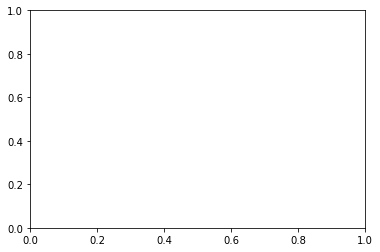

In [142]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)